
# <font color = green>CNN Skin Cancer detection assignment<font>

##### <font color = green> By: Rishi Rohra <font>
    
 


## <font color = blue>Problem Statement  <font>
`To build a CNN based model which can accurately detect melanoma`. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.


The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.
The data set contains the following diseases:

- Actinic keratosis
- Basal cell carcinoma
- Dermatofibroma
- Melanoma
- Nevus
- Pigmented benign keratosis
- Seborrheic keratosis
- Squamous cell carcinoma
- Vascular lesion

**<font color="blue">Input Data:</font>**
- `https://drive.google.com/file/d/1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs/view`

    
## <font color = red> Business Goal  <font>

 
To build a CNN based model which can accurately detect melanoma

In [3]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [7]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob

In [8]:
# Defining the path for train and test images
## paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')
     

In [9]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2247
118


##Load using keras.preprocessing
Let's load these images off disk using the helpful image_dataset_from_directory utility.

##Create a dataset
Define some parameters for the loader:

In [10]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [12]:
## Writing train datasets
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)
     

Found 2247 files belonging to 9 classes.
Using 1798 files for training.


In [13]:
## Writing validation dataset
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2247 files belonging to 9 classes.
Using 449 files for validation.


In [14]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


###Visualize the data
Todo, create a code to visualize one instance of all the nine classes present in the dataset


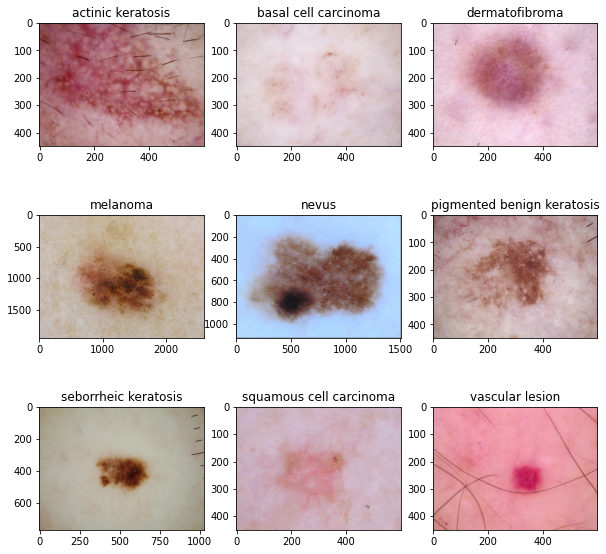

In [15]:
import matplotlib.pyplot as plt
### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [16]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

###Create the model
Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not id

##Model 1 : CNN Model

In [17]:
### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

###Compile the model
Choose an appropirate optimiser and loss function for model training

In [18]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

###Train the model

In [20]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


57/57 [==============================] - 565s 2s/step - loss: 2.0303 - accuracy: 0.2086 - val_loss: 1.9753 - val_accuracy: 0.2762
Epoch 2/20
57/57 [==============================] - 4s 75ms/step - loss: 1.9175 - accuracy: 0.2781 - val_loss: 1.8614 - val_accuracy: 0.3207
Epoch 3/20
57/57 [==============================] - 4s 75ms/step - loss: 1.9697 - accuracy: 0.2614 - val_loss: 1.9951 - val_accuracy: 0.2094
Epoch 4/20
57/57 [==============================] - 4s 75ms/step - loss: 1.9143 - accuracy: 0.2686 - val_loss: 1.8383 - val_accuracy: 0.3252
Epoch 5/20
57/57 [==============================] - 4s 75ms/step - loss: 1.7558 - accuracy: 0.3459 - val_loss: 1.6637 - val_accuracy: 0.3942
Epoch 6/20
57/57 [==============================] - 4s 75ms/step - loss: 1.6882 - accuracy: 0.3826 - val_loss: 1.7236 - val_accuracy: 0.3563
Epoch 7/20
57/57 [==============================] - 4s 75ms/step - loss: 1.5991 - accuracy: 0.4182 - val_loss: 1.5802 - val_accuracy: 0.4254
Epoch 8/20
57/57 [======

##Visualizing training results


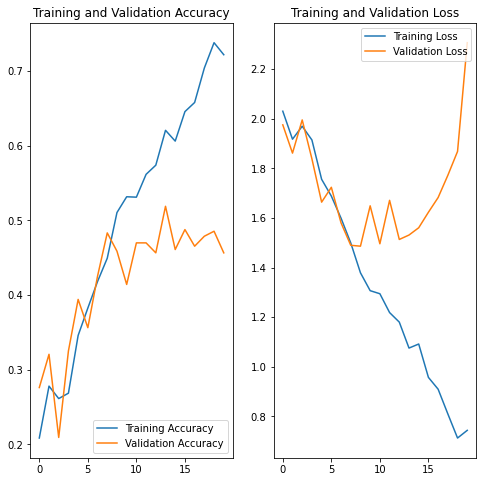

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit
Finding on the first base model

1.The model is overfitting because we can also see difference in loss
functions in training & test around the 10-11th epoch

2.The accuracy is just around 75-80% because there are enough features to remember the pattern.

3.But again, it's too early to comment on the overfitting & underfitting debate

In [22]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

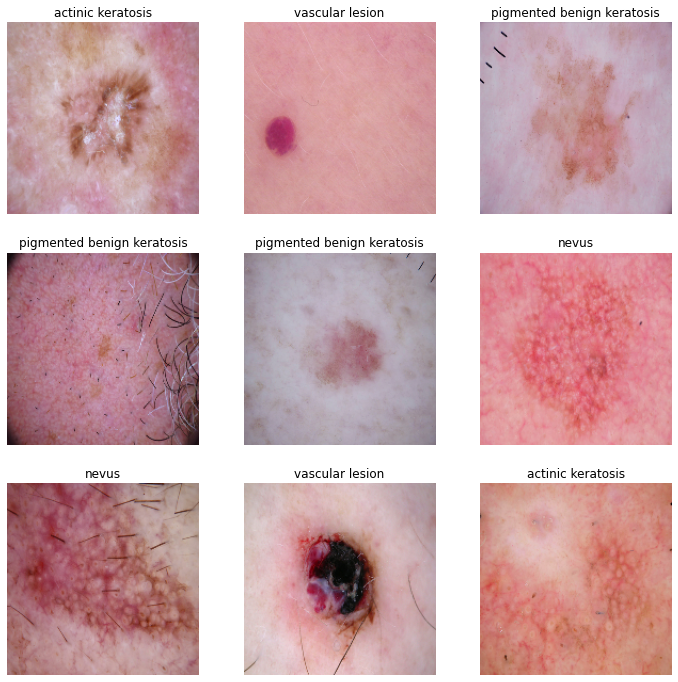

In [23]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
     

###Todo:
Create the model, compile and train the model

##Model 2 : CNN Model Using Data Augementation

In [24]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

     

##Compiling the model

In [25]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

##Training the model

In [26]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
   

Epoch 1/20
57/57 [==============================] - 8s 121ms/step - loss: 2.0602 - accuracy: 0.1980 - val_loss: 2.0479 - val_accuracy: 0.2205
Epoch 2/20
57/57 [==============================] - 6s 103ms/step - loss: 2.0022 - accuracy: 0.2275 - val_loss: 1.9553 - val_accuracy: 0.2984
Epoch 3/20
57/57 [==============================] - 6s 104ms/step - loss: 1.7919 - accuracy: 0.3482 - val_loss: 1.7329 - val_accuracy: 0.4009
Epoch 4/20
57/57 [==============================] - 6s 102ms/step - loss: 1.7007 - accuracy: 0.4016 - val_loss: 1.6926 - val_accuracy: 0.4143
Epoch 5/20
57/57 [==============================] - 6s 103ms/step - loss: 1.6329 - accuracy: 0.4232 - val_loss: 1.7902 - val_accuracy: 0.4454
Epoch 6/20
57/57 [==============================] - 6s 102ms/step - loss: 1.5049 - accuracy: 0.4705 - val_loss: 1.5196 - val_accuracy: 0.4944
Epoch 7/20
57/57 [==============================] - 6s 106ms/step - loss: 1.4697 - accuracy: 0.4805 - val_loss: 1.4809 - val_accuracy: 0.4967
Epoch 

##Visualizing the results

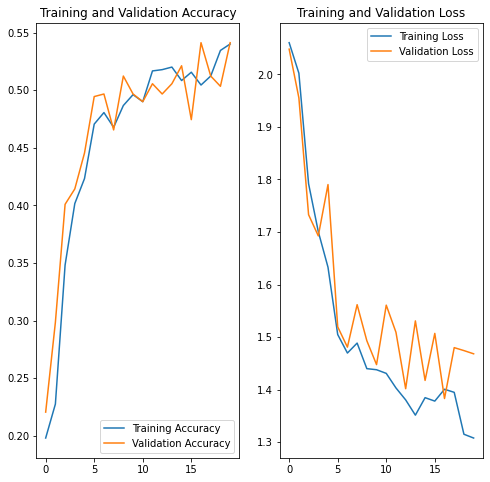

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Todo:** Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

###**Finding from Second Model**

1.There is no improvement in accuracy but we can definitely see the overfitting problem has solved due to data augmentation

2.We can increase the epochs to increase the accuracy so it's too early for judgement

###**Todo:** Find the distribution of classes in the training dataset.

**Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [28]:
## Your code goes here.
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/CNN_assignment/Skin can...,actinic keratosis
1,/content/drive/MyDrive/CNN_assignment/Skin can...,actinic keratosis
2,/content/drive/MyDrive/CNN_assignment/Skin can...,actinic keratosis
3,/content/drive/MyDrive/CNN_assignment/Skin can...,actinic keratosis
4,/content/drive/MyDrive/CNN_assignment/Skin can...,actinic keratosis
...,...,...
2242,/content/drive/MyDrive/CNN_assignment/Skin can...,vascular lesion
2243,/content/drive/MyDrive/CNN_assignment/Skin can...,vascular lesion
2244,/content/drive/MyDrive/CNN_assignment/Skin can...,vascular lesion
2245,/content/drive/MyDrive/CNN_assignment/Skin can...,vascular lesion


In [29]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/CNN_assignment/Skin can...,actinic keratosis
1,/content/drive/MyDrive/CNN_assignment/Skin can...,actinic keratosis
2,/content/drive/MyDrive/CNN_assignment/Skin can...,actinic keratosis
3,/content/drive/MyDrive/CNN_assignment/Skin can...,actinic keratosis
4,/content/drive/MyDrive/CNN_assignment/Skin can...,actinic keratosis
...,...,...
2242,/content/drive/MyDrive/CNN_assignment/Skin can...,vascular lesion
2243,/content/drive/MyDrive/CNN_assignment/Skin can...,vascular lesion
2244,/content/drive/MyDrive/CNN_assignment/Skin can...,vascular lesion
2245,/content/drive/MyDrive/CNN_assignment/Skin can...,vascular lesion


<BarContainer object of 9 artists>

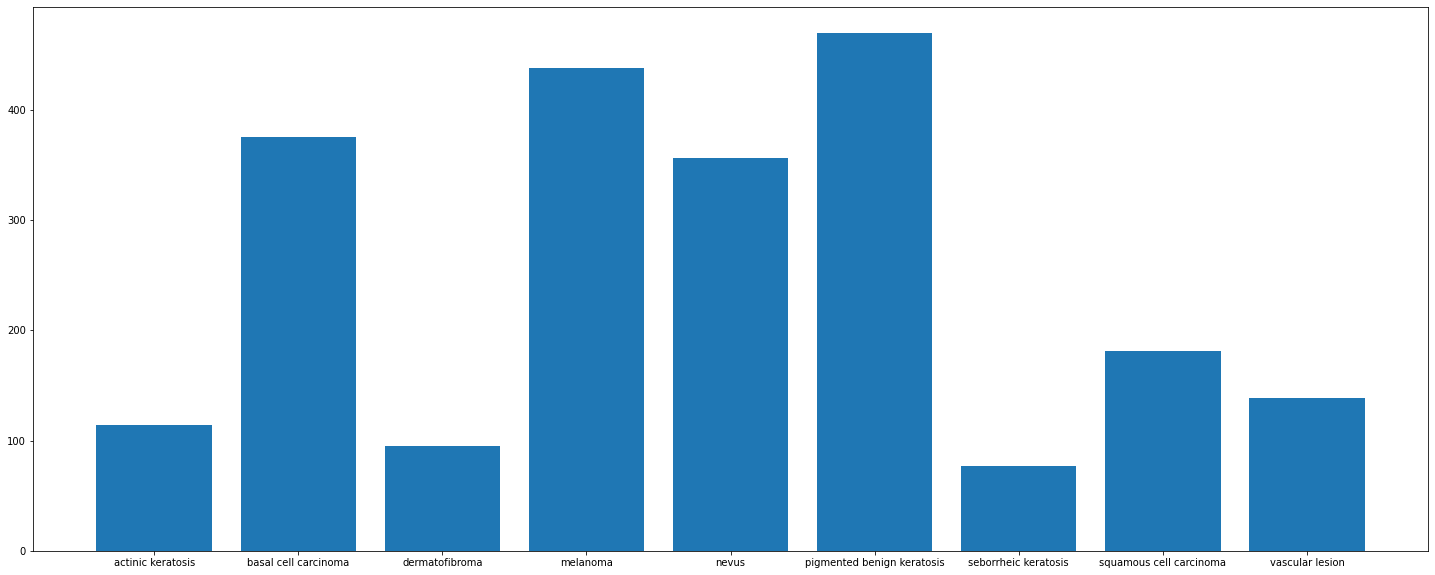

In [30]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

**Todo:** Write your findings here:

**- Which class has the least number of samples?**

Answer :- squamous cell carcinoma has least number of samples

**- Which classes dominate the data in terms proportionate number of samples**?

Answer :- actinic keratosis and dermatofibroma have proportionate number of classes. melanoma and pigmented benign keratosis have proprtionate number of classes

In [32]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

**Todo:** Rectify the class imbalance

**Context:** You can use a python package known as Augmentor to add more samples across all classes so that none of the classes have very few samples.


In [33]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**To use Augmentor,** the following general procedure is followed:

1.Instantiate a Pipeline object pointing to a directory containing your initial image data set.

2.Define a number of operations to perform on this data set using your Pipeline object.

3.Execute these operations by calling the Pipeline’s sample() method.

In [35]:
path_to_training_dataset="To do"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline('/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2247 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4790055130>: 100%|██████████| 500/500 [00:39<00:00, 12.76 Samples/s]


Initialised with 2247 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F4724417D00>: 100%|██████████| 500/500 [00:43<00:00, 11.62 Samples/s]


Initialised with 2247 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F473C04DD60>: 100%|██████████| 500/500 [00:38<00:00, 12.98 Samples/s]


Initialised with 2247 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F480785D460>: 100%|██████████| 500/500 [00:43<00:00, 11.37 Samples/s]


Initialised with 2247 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F473C3C2370>: 100%|██████████| 500/500 [00:45<00:00, 11.00 Samples/s]


Initialised with 2247 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F473C69D4F0>: 100%|██████████| 500/500 [00:35<00:00, 14.26 Samples/s]


Initialised with 2247 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F47C1DD1640>: 100%|██████████| 500/500 [00:46<00:00, 10.86 Samples/s]


Initialised with 2247 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F473C1477F0>: 100%|██████████| 500/500 [00:44<00:00, 11.25 Samples/s]


Initialised with 2247 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F479072D610>: 100%|██████████| 500/500 [00:42<00:00, 11.76 Samples/s]


####Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [37]:
data_dir_train1 = pathlib.Path("/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [38]:
for i in class_names:
      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/drive/MyDrive/CNN_assignment/Skin can...,actinic keratosis
1,/content/drive/MyDrive/CNN_assignment/Skin can...,actinic keratosis
2,/content/drive/MyDrive/CNN_assignment/Skin can...,actinic keratosis
3,/content/drive/MyDrive/CNN_assignment/Skin can...,actinic keratosis
4,/content/drive/MyDrive/CNN_assignment/Skin can...,actinic keratosis
...,...,...
6742,/content/drive/MyDrive/CNN_assignment/Skin can...,vascular lesion
6743,/content/drive/MyDrive/CNN_assignment/Skin can...,vascular lesion
6744,/content/drive/MyDrive/CNN_assignment/Skin can...,vascular lesion
6745,/content/drive/MyDrive/CNN_assignment/Skin can...,vascular lesion


###Lets see the distribution of augmented data after adding new images to the original training data.

In [39]:
new_df['Label'].value_counts()

pigmented benign keratosis    1394
melanoma                      1302
basal cell carcinoma          1189
nevus                         1084
squamous cell carcinoma        533
vascular lesion                395
actinic keratosis              326
dermatofibroma                 289
seborrheic keratosis           235
Name: Label, dtype: int64

####So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

In [40]:
new_df['Label'].value_counts()

pigmented benign keratosis    1394
melanoma                      1302
basal cell carcinoma          1189
nevus                         1084
squamous cell carcinoma        533
vascular lesion                395
actinic keratosis              326
dermatofibroma                 289
seborrheic keratosis           235
Name: Label, dtype: int64

#### now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

**Todo:** Train the model on the data created using Augmentor

In [41]:
batch_size = 32
img_height = 180
img_width = 180

In [43]:
import pathlib
#data_dir_train1=pathlib.Path("/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
data_dir_train1=pathlib.Path("/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

**Todo:** Create a training dataset

In [44]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

2247


In [47]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


data_dir_train1=pathlib.Path("/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6747 files belonging to 10 classes.
Using 5398 files for training.


**Todo:** Create a validation dataset

In [48]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6747 files belonging to 10 classes.
Using 1349 files for validation.


**Todo:** Create your model (make sure to include normalization)

###**Model 3 :** CNN Model With Normalization using Augmentor Library

In [49]:
## your code goes here
## Using Dropout layer for any evidence of overfitting in the findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

**Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [50]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Todo:** Train your model

In [51]:
## Your code goes here, use 50 epochs.
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 39s 224ms/step - loss: nan - accuracy: 0.0263 - val_loss: nan - val_accuracy: 0.0230
Epoch 2/50
169/169 [==============================] - 36s 205ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 3/50
169/169 [==============================] - 36s 205ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 4/50
169/169 [==============================] - 36s 204ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 5/50
169/169 [==============================] - 36s 206ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 6/50
169/169 [==============================] - 36s 208ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 7/50
169/169 [==============================] - 37s 216ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 8/50
169/169 [==================

####**Todo:** Visualize the model results

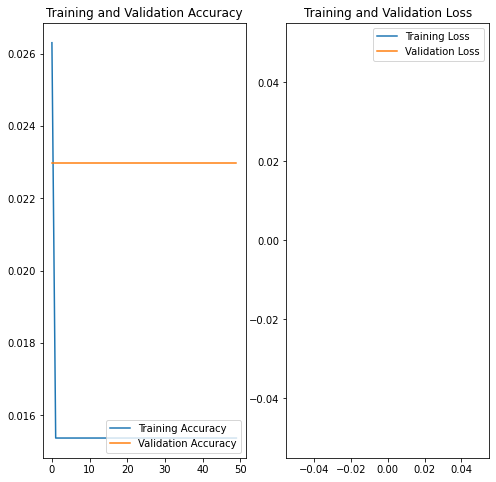

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Todo:** 

Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

1.Accuracy on training data has increased by using Augmentor library

2.Model is still overfitting

3.The problem of overfitting can be solved by add more layer,neurons or adding dropout layers.

4.The Model can be further improved by tuning the hyperparameter